<a href="https://colab.research.google.com/github/SLIIT-24-25J-047-Research/INTERVIEW-PROCESSING-SYSTEM/blob/IT21167232-Shehela_Anjalie-Model_Train/code_complexity_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Load data
data = pd.read_excel("/content/metrics.xlsx")

# Correlation matrix
corr_matrix = data[['CC', 'CFC', 'WCC', 'Average']].corr()


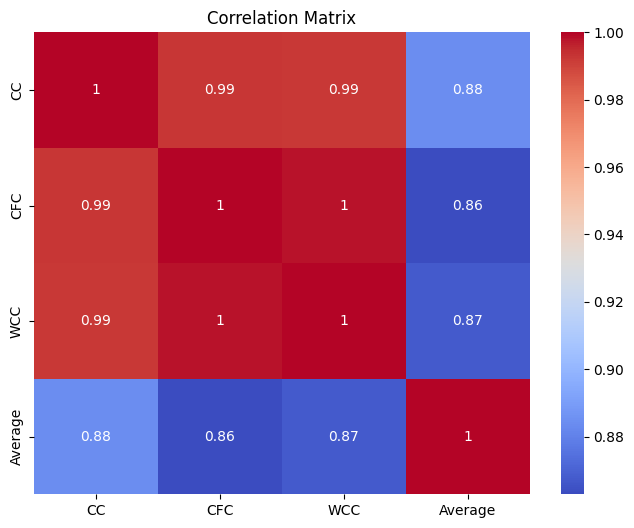

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=['CC', 'CFC', 'WCC', 'Average'], yticklabels=['CC', 'CFC', 'WCC', 'Average'])
plt.title("Correlation Matrix")
plt.show()

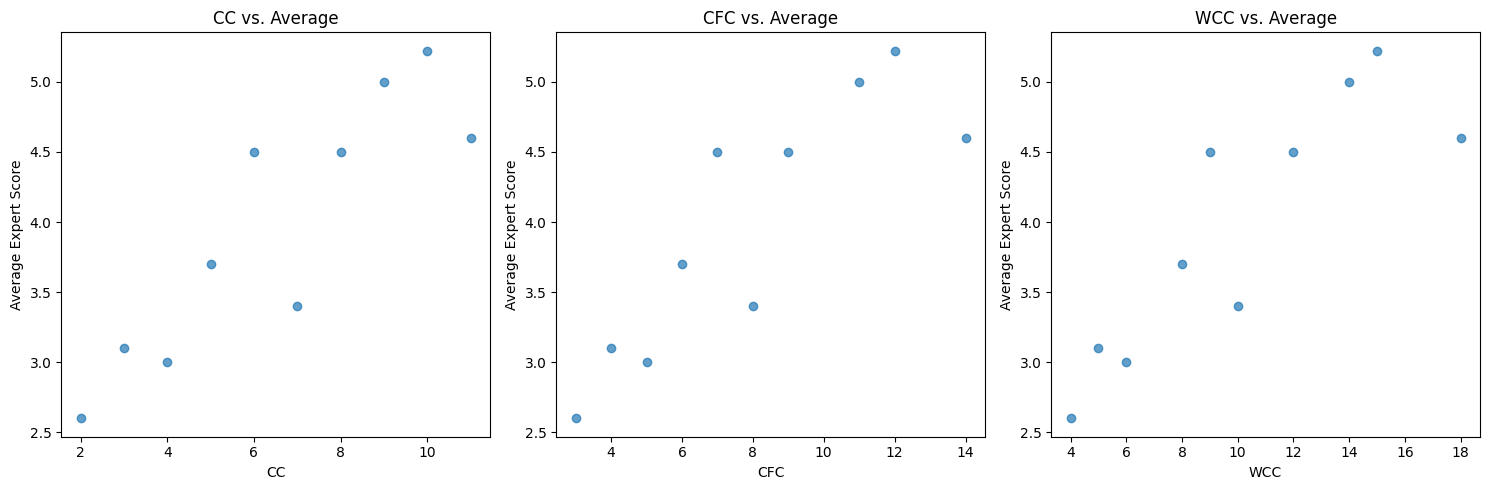

In [ ]:
# Scatter plots for each metric vs. Average
metrics = ['CC', 'CFC', 'WCC']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    plt.scatter(data[metric], data['Average'], alpha=0.7)
    plt.xlabel(metric)
    plt.ylabel("Average Expert Score")
    plt.title(f"{metric} vs. Average")
plt.tight_layout()
plt.show()


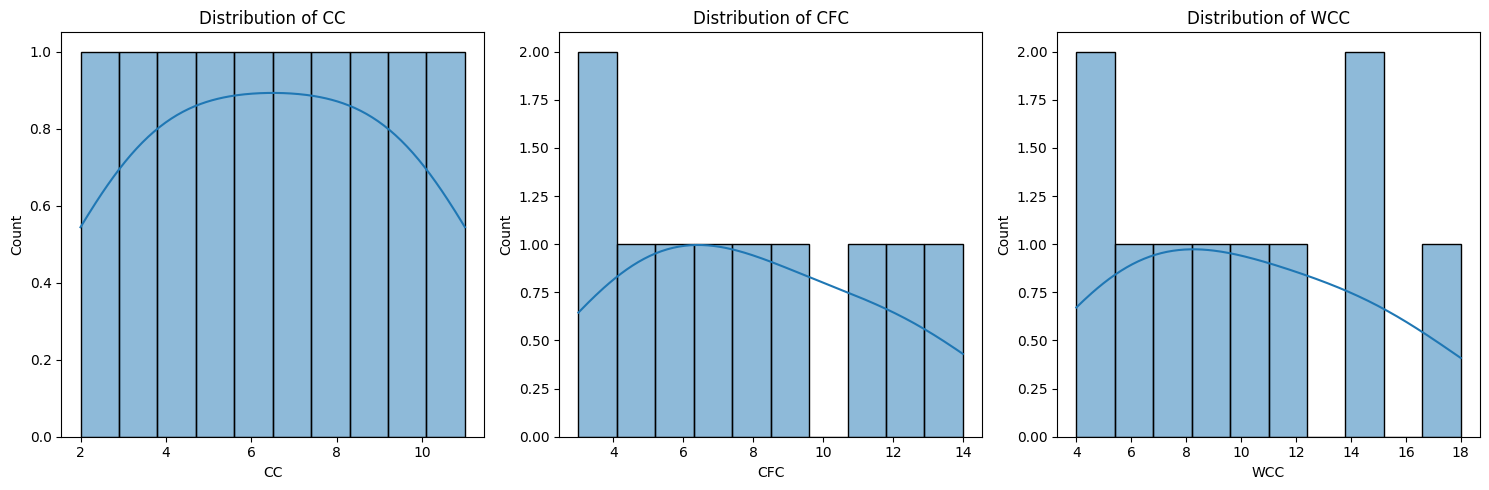

In [ ]:
# Distribution of metrics
plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[metric], kde=True, bins=10)
    plt.title(f"Distribution of {metric}")
plt.tight_layout()
plt.show()


In [ ]:
# Load the Excel file
file_path = "/content/metrics.xlsx"  # Replace with your actual file path
data = pd.read_excel(file_path)

In [ ]:
# Extract features (CC, CFC, WCC) and target (Average)
X = data[['CC', 'CFC', 'WCC']]
y = data['Average']

In [ ]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train the regression model
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [ ]:
# Extract weights (coefficients)
weights = model.coef_
bias = model.intercept_
print(f"Weights: CC = {weights[0]:.3f}, CFC = {weights[1]:.3f}, WCC = {weights[2]:.3f}")
print(f"Model Bias (b): {bias}")


Weights: CC = 4.983, CFC = -5.597, WCC = 2.925
Model Bias (b): 2.6895663956639577


In [ ]:
# Evaluate the model
r2_score = model.score(X_scaled, y)
print(f"Model R² Score: {r2_score:.3f}")

Model R² Score: 0.801


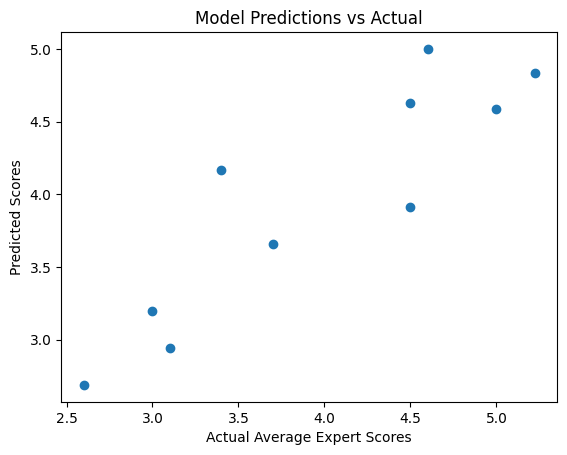

In [ ]:
# Plot predicted vs actual values
y_pred = model.predict(X_scaled)
plt.scatter(y, y_pred)
plt.xlabel("Actual Average Expert Scores")
plt.ylabel("Predicted Scores")
plt.title("Model Predictions vs Actual")
plt.show()

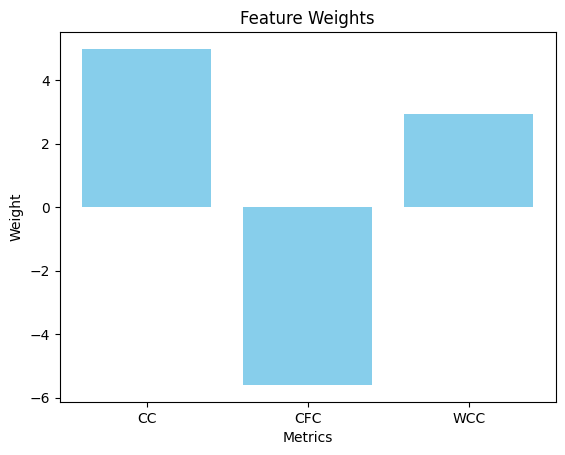

In [ ]:
# Feature weights
weights = model.coef_
plt.bar(metrics, weights, color='skyblue')
plt.xlabel("Metrics")
plt.ylabel("Weight")
plt.title("Feature Weights")
plt.show()


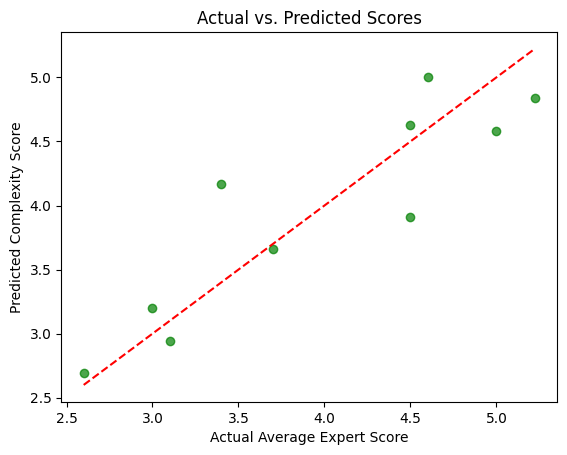

In [ ]:
# Predicted vs Actual
y_pred = model.predict(X_scaled)

plt.scatter(data['Average'], y_pred, alpha=0.7, color='green')
plt.plot([min(data['Average']), max(data['Average'])], [min(data['Average']), max(data['Average'])], color='red', linestyle='--')
plt.xlabel("Actual Average Expert Score")
plt.ylabel("Predicted Complexity Score")
plt.title("Actual vs. Predicted Scores")
plt.show()


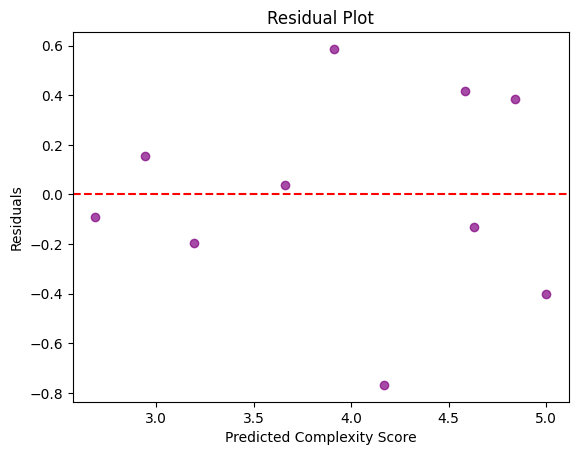

In [ ]:
residuals = data['Average'] - y_pred

plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Complexity Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'code_complexity_model.pkl')


['code_complexity_model.pkl']